In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import os.path
import pytest
import os.path as op
import sys
import matplotlib.pyplot as plt
import scipy
import glob
from pathlib import Path

sys.path.insert(0,str(Path("~/projects/imtools").expanduser()))

import imtools.trainer3d
import imtools.datasets
import imtools.ml
import io3d
import sed3

PyQt5 detected


# Training

In [3]:
# Define feature function
def externfv(data3d, voxelsize_mm):        # scale
    f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
    f1 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=1).reshape(-1, 1) - f0
    fv = np.concatenate([
        f0, f1
    ], 1)
    return fv

In [4]:

ol = imtools.trainer3d.Trainer3D()
# select feature function
ol.feature_function = externfv
# select classifier
# ol.cl = imtools.ml.gmmcl.GMMCl(n_components=3)

for i in range(1, 5):
    datap = io3d.datasets.read_dataset("3Dircadb1", 'data3d', i)
    datap_liver = io3d.datasets.read_dataset("3Dircadb1", 'liver', i)
    ol.add_train_data(datap["data3d"], datap_liver["data3d"], voxelsize_mm=datap["voxelsize_mm"])

ol.fit()

2020-11-22 13:50:50.784 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-11-22 13:50:50.961 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_.
2020-11-22 13:50:50.967 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical
2020-11-22 13:50:51.022 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig
2020-11-22 13:50:51.038 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.1
2020-11-22 13:50:51.055 | DEBUG    | io3d.datasets:dataset_path:518 - found value h:/medical/orig/3Dircadb1.1
2020-11-22 13:50:51.068 | DEBUG    | io3d.datasets:dataset_path:520 - path_to_join=medical/orig/3Dircadb1.1/PATIENT_DICOM/
2020-11-22 13:50:51.088 | DEBUG    | io3d.datasets:dataset_path:521 - spth=medical/orig/3Dircadb1.1
2020-11-22 13:50:51.095 | DEBUG    | io3d.datasets:dataset_pat

2020-11-22 13:50:52.622 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_34
2020-11-22 13:50:52.645 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_35
2020-11-22 13:50:52.666 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_36
2020-11-22 13:50:52.682 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_37
2020-11-22 13:50:52.699 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_38
2020-11-22 13:50:52.718 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PAT

2020-11-22 13:50:53.909 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_83
2020-11-22 13:50:53.928 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_84
2020-11-22 13:50:53.943 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_85
2020-11-22 13:50:53.965 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_86
2020-11-22 13:50:53.980 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PATIENT_DICOM\image_87
2020-11-22 13:50:54.007 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 67633152, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\PAT

2020-11-22 13:50:54.943 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:50:54.945 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:50:54.947 | INFO     | io3d.dcmreaddata:get_metaData:580 - Problem with tag SeriesDescription, SeriesNumber: 
2020-11-22 13:50:54.949 | INFO     | io3d.dcmreaddata:get_metaData:585 - Problem with tag ImageComments
2020-11-22 13:50:55.079 | DEBUG    | io3d.datareader:Get3DData:169 - dataplus format
2020-11-22 13:50:55.081 | DEBUG    | io3d.datareader:Get3DData:173 - datap keys () : dict_keys(['voxelsize_mm', 'Modality', 'SeriesNumber', 'AcquisitionDate', 'StudyDate', 'StudyID', 'PatientSex', 'PatientID', 'PatientName', 'dcmfilelist', 'series_number', 'datadir', 'data3d'])
2020-11-22 13:50:55.082 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-11-22 13:50:55.092 |

2020-11-22 13:50:55.616 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_28
2020-11-22 13:50:55.631 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_29
2020-11-22 13:50:55.648 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_30
2020-11-22 13:50:55.663 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_31
2020-11-22 13:50:55.680 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_32
2020-11-22 13:50:55.691 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\

2020-11-22 13:50:56.359 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_76
2020-11-22 13:50:56.377 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_77
2020-11-22 13:50:56.403 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_78
2020-11-22 13:50:56.449 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_79
2020-11-22 13:50:56.471 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_80
2020-11-22 13:50:56.487 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\

2020-11-22 13:50:57.213 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_123
2020-11-22 13:50:57.228 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_124
2020-11-22 13:50:57.248 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_125
2020-11-22 13:50:57.321 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_126
2020-11-22 13:50:57.337 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\medical\orig\3Dircadb1.1\MASKS_DICOM\liver\image_127
2020-11-22 13:50:57.352 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 33816576, shape: (512, 512)x129 file h:\med

2020-11-22 13:51:04.999 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_22
2020-11-22 13:51:05.014 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_23
2020-11-22 13:51:05.029 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_24
2020-11-22 13:51:05.042 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_25
2020-11-22 13:51:05.057 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_26
2020-11-22 13:51:05.070 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PAT

2020-11-22 13:51:05.638 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_71
2020-11-22 13:51:05.649 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_72
2020-11-22 13:51:05.661 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_73
2020-11-22 13:51:05.673 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_74
2020-11-22 13:51:05.685 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_75
2020-11-22 13:51:05.696 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PAT

2020-11-22 13:51:06.292 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_120
2020-11-22 13:51:06.305 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_121
2020-11-22 13:51:06.317 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_122
2020-11-22 13:51:06.329 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_123
2020-11-22 13:51:06.340 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_124
2020-11-22 13:51:06.353 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.

2020-11-22 13:51:06.922 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_168
2020-11-22 13:51:06.934 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_169
2020-11-22 13:51:06.946 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_170
2020-11-22 13:51:06.961 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 90177536, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_171
2020-11-22 13:51:07.159 | DEBUG    | io3d.dcmreaddata:get_metaData:529 - Filename: h:\medical\orig\3Dircadb1.2\PATIENT_DICOM\image_0
2020-11-22 13:51:07.213 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:51:07.216 | DEBUG    | io3d.

2020-11-22 13:51:07.998 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_23
2020-11-22 13:51:08.012 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_24
2020-11-22 13:51:08.028 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_25
2020-11-22 13:51:08.043 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_26
2020-11-22 13:51:08.063 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_27
2020-11-22 13:51:08.077 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\

2020-11-22 13:51:08.880 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_71
2020-11-22 13:51:08.894 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_72
2020-11-22 13:51:08.912 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_73
2020-11-22 13:51:08.932 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_74
2020-11-22 13:51:08.952 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_75
2020-11-22 13:51:09.006 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\

2020-11-22 13:51:09.521 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_118
2020-11-22 13:51:09.532 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_119
2020-11-22 13:51:09.543 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_120
2020-11-22 13:51:09.554 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_121
2020-11-22 13:51:09.566 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_122
2020-11-22 13:51:09.577 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\med

2020-11-22 13:51:10.061 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_165
2020-11-22 13:51:10.072 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_166
2020-11-22 13:51:10.082 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_167
2020-11-22 13:51:10.093 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_168
2020-11-22 13:51:10.103 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\medical\orig\3Dircadb1.2\MASKS_DICOM\liver\image_169
2020-11-22 13:51:10.114 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 45088768, shape: (512, 512)x172 file h:\med

2020-11-22 13:51:18.316 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_21
2020-11-22 13:51:18.333 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_22
2020-11-22 13:51:18.349 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_23
2020-11-22 13:51:18.366 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_24
2020-11-22 13:51:18.382 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_25
2020-11-22 13:51:18.398 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1

2020-11-22 13:51:18.998 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_69
2020-11-22 13:51:19.060 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_70
2020-11-22 13:51:19.073 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_71
2020-11-22 13:51:19.086 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_72
2020-11-22 13:51:19.099 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_73
2020-11-22 13:51:19.115 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1

2020-11-22 13:51:19.718 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_117
2020-11-22 13:51:19.733 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_118
2020-11-22 13:51:19.748 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_119
2020-11-22 13:51:19.760 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_120
2020-11-22 13:51:19.773 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_121
2020-11-22 13:51:19.786 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dir

2020-11-22 13:51:20.391 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_165
2020-11-22 13:51:20.406 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_166
2020-11-22 13:51:20.422 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_167
2020-11-22 13:51:20.438 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_168
2020-11-22 13:51:20.451 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_169
2020-11-22 13:51:20.466 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dir

2020-11-22 13:51:21.287 | DEBUG    | io3d.datasets:dataset_path:522 - new_path_to_join=MASKS_DICOM\liver, npth.resolve=MASKS_DICOM\liver
2020-11-22 13:51:21.289 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.3/MASKS_DICOM
2020-11-22 13:51:21.295 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.3/MASKS_DICOM/liver
2020-11-22 13:51:21.300 | DEBUG    | io3d.datasets:dataset_path:536 - returning path=h:/medical/orig/3Dircadb1.3 , new_path_to_join=MASKS_DICOM\liver
2020-11-22 13:51:21.302 | DEBUG    | io3d.datasets:joinp:345 - sample_data_path=h:/medical/orig/3Dircadb1.3, path_to_joina=MASKS_DICOM\liver
2020-11-22 13:51:21.303 | DEBUG    | io3d.datasets:joinp:346 - path h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver
2020-11-22 13:51:21.311 | DEBUG    | io3d.datareader:Get3DData:153 - directory read recognized
2020-11-22 13:51:21.356 | DEBUG    | io3d.datareader:__

2020-11-22 13:51:21.854 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_40
2020-11-22 13:51:21.865 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_41
2020-11-22 13:51:21.875 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_42
2020-11-22 13:51:21.885 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_43
2020-11-22 13:51:21.896 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_44
2020-11-22 13:51:21.908 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\

2020-11-22 13:51:22.429 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_88
2020-11-22 13:51:22.441 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_89
2020-11-22 13:51:22.452 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_90
2020-11-22 13:51:22.464 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_91
2020-11-22 13:51:22.475 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_92
2020-11-22 13:51:22.485 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\

2020-11-22 13:51:22.988 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_135
2020-11-22 13:51:23.000 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_136
2020-11-22 13:51:23.013 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_137
2020-11-22 13:51:23.026 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_138
2020-11-22 13:51:23.036 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_139
2020-11-22 13:51:23.049 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\med

2020-11-22 13:51:23.530 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_182
2020-11-22 13:51:23.541 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_183
2020-11-22 13:51:23.552 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_184
2020-11-22 13:51:23.564 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_185
2020-11-22 13:51:23.575 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\MASKS_DICOM\liver\image_186
2020-11-22 13:51:23.584 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 52428800, shape: (512, 512)x200 file h:\med

2020-11-22 13:51:28.296 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_10
2020-11-22 13:51:28.314 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_11
2020-11-22 13:51:28.331 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_12
2020-11-22 13:51:28.345 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_13
2020-11-22 13:51:28.361 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_14
2020-11-22 13:51:28.374 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_D

2020-11-22 13:51:29.071 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_59
2020-11-22 13:51:29.087 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_60
2020-11-22 13:51:29.101 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_61
2020-11-22 13:51:29.116 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_62
2020-11-22 13:51:29.132 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_DICOM\image_63
2020-11-22 13:51:29.146 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 47710208, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\PATIENT_D

2020-11-22 13:51:29.789 | DEBUG    | io3d.datasets:joinp:345 - sample_data_path=h:/medical/orig/3Dircadb1.4, path_to_joina=MASKS_DICOM\liver
2020-11-22 13:51:29.791 | DEBUG    | io3d.datasets:joinp:346 - path h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver
2020-11-22 13:51:29.796 | DEBUG    | io3d.datareader:Get3DData:153 - directory read recognized
2020-11-22 13:51:29.824 | DEBUG    | io3d.datareader:__ReadFromDirectory:194 - Dir - DICOM
2020-11-22 13:51:29.826 | DEBUG    | io3d.datareader:__ReadFromDirectory:195 - dicom_expected None
2020-11-22 13:51:29.832 | INFO     | io3d.misc:read_pkl_and_pklz:115 - Input gzip exception: Not a gzipped file (b'\x80\x04')
2020-11-22 13:51:29.839 | DEBUG    | io3d.dcmreaddata:get_sorted_series_files:808 - SeriesNumber: None
2020-11-22 13:51:29.872 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_0
2020-11-22 13:51:29.881 | DEBUG    | io3d.dcmreaddata:get_3

2020-11-22 13:51:30.416 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_43
2020-11-22 13:51:30.429 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_44
2020-11-22 13:51:30.443 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_45
2020-11-22 13:51:30.456 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_46
2020-11-22 13:51:30.469 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_47
2020-11-22 13:51:30.481 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 23855104, shape: (512, 512)x91 file h:\medical\orig\3

2020-11-22 13:51:31.087 | DEBUG    | io3d.dcmreaddata:get_metaData:529 - Filename: h:\medical\orig\3Dircadb1.4\MASKS_DICOM\liver\image_0
2020-11-22 13:51:31.111 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:51:31.113 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:51:31.130 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:51:31.132 | DEBUG    | io3d.dcmreaddata:get_slice_location:917 - Estimating SliceLocation wiht image number and SliceThickness
2020-11-22 13:51:31.133 | INFO     | io3d.dcmreaddata:get_metaData:580 - Problem with tag SeriesDescription, SeriesNumber: 
2020-11-22 13:51:31.135 | INFO     | io3d.dcmreaddata:get_metaData:585 - Problem with tag ImageComments
2020-11-22 13:51:31.216 | DEBUG    | io3d.datareader:Get3DData:169 - da

# Testing

In [7]:
# one = list(imtools.datasets.sliver_reader("*000.mhd", read_seg=True))[0]
# numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
i = 3
datap = io3d.datasets.read_dataset("3Dircadb1", 'data3d', i)
fit = ol.predict(datap["data3d"], voxelsize_mm=datap["voxelsize_mm"])



2020-11-22 13:53:04.940 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-11-22 13:53:04.952 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_.
2020-11-22 13:53:04.957 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical
2020-11-22 13:53:04.964 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig
2020-11-22 13:53:04.969 | DEBUG    | io3d.datasets:dataset_path:514 - checking for key local_dataset_specific_dir_medical/orig/3Dircadb1.3
2020-11-22 13:53:04.973 | DEBUG    | io3d.datasets:dataset_path:518 - found value h:/medical/orig/3Dircadb1.3
2020-11-22 13:53:04.977 | DEBUG    | io3d.datasets:dataset_path:520 - path_to_join=medical/orig/3Dircadb1.3/PATIENT_DICOM/
2020-11-22 13:53:04.979 | DEBUG    | io3d.datasets:dataset_path:521 - spth=medical/orig/3Dircadb1.3
2020-11-22 13:53:04.981 | DEBUG    | io3d.datasets:dataset_pat

2020-11-22 13:53:05.707 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_36
2020-11-22 13:53:05.722 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_37
2020-11-22 13:53:05.739 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_38
2020-11-22 13:53:05.757 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_39
2020-11-22 13:53:05.779 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_40
2020-11-22 13:53:05.809 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1

2020-11-22 13:53:06.698 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_84
2020-11-22 13:53:06.717 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_85
2020-11-22 13:53:06.743 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_86
2020-11-22 13:53:06.760 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_87
2020-11-22 13:53:06.776 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_88
2020-11-22 13:53:06.798 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1

2020-11-22 13:53:07.682 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_132
2020-11-22 13:53:07.698 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_133
2020-11-22 13:53:07.716 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_134
2020-11-22 13:53:07.739 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_135
2020-11-22 13:53:07.756 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_136
2020-11-22 13:53:07.781 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dir

2020-11-22 13:53:08.629 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_180
2020-11-22 13:53:08.646 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_181
2020-11-22 13:53:08.662 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_182
2020-11-22 13:53:08.676 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_183
2020-11-22 13:53:08.690 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dircadb1.3\PATIENT_DICOM\image_184
2020-11-22 13:53:08.703 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 104857600, shape: (512, 512)x200 file h:\medical\orig\3Dir

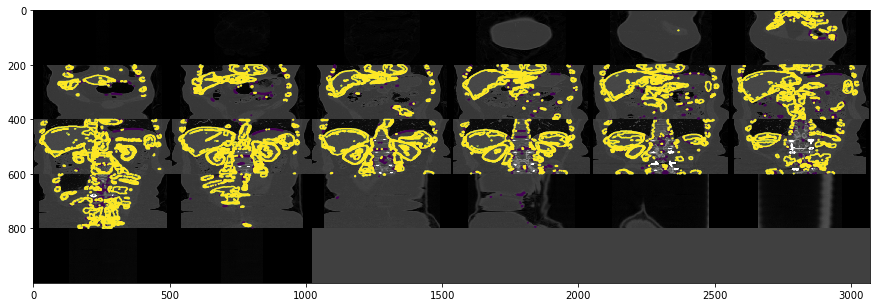

In [12]:
#  visualization
plt.figure(figsize=(15, 10))
sed3.show_slices(datap["data3d"], fit, slice_step=20, axis=1, flipV=False)